In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import humanize
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
method_palette = { "LoFreq": "#9593D9",
                   "ShoRAH": "#ffe66d",
                   "CliqueSNV":  "#4ecdc4",
                   "VILOCA": "#ff6b6b",
                   "PredictHaplo": "#227c9d",
                   "ground_truth": "grey",}

mapping_methods = {
    'cliquesnv_local_haplo_snv_tf0.01': "CliqueSNV",
    'cliquesnv_local_haplo_snv': "CliqueSNV",
    'cliquesnv_local_haplo_tf0.01': "CliqueSNV",
    'cliquesnv_local_haplo': "CliqueSNV",
    'shorah_default': 'ShoRAH',
    'lofreq_local_haplo': 'LoFreq',
    'viloca_alpha_0.00001': 'VILOCA',
    'viloca_alpha_0.00001_K100': 'VILOCA',
    'viloca_multi': 'VILOCA',
    'ground_truth': "ground truth",
    'predicthaplo_local_haplo': 'PredictHaplo'
}

In [3]:
mapping_haplos = {
    '2@3@30@20@20@geom@0.75': 'Population 1', 
    '5@5@30@10@15@geom@0.75': 'Population 2',
    '5@10@30@10@10@geom@0.75': 'Population 3', 
    '5@15@30@10@15@geom@0.75': 'Population 4', 
    
    '2@3@600@400@400@geom@0.75': 'Population 5',
    '2@3@600@600@600@geom@0.75': 'Population 6',
    '5@5@600@200@300@geom@0.75': 'Population 7', 
    '5@10@600@200@240@geom@0.75': 'Population 8',
}

In [4]:
fname_viloca_posterior = "results/distance/performance_measures/performance_mutation_calls_posterior_thres.csv"
fname_local = "results/distance/performance_measures/local/performance.csv"

In [5]:
df_local = pd.read_csv(fname_local).drop(columns=["Unnamed: 0"])

df_local = df_local[(~df_local['method'].str.startswith("viloca")) 
                    & (~df_local['method'].str.startswith("shorah"))
                    & (~df_local['method'].str.startswith("predicthaplo"))] # predicthaplo does not provide snvs

df_local = df_local.pivot(index=['method', 'params', 'replicate'], columns='variable', values='value').reset_index()

df_local.loc[:, 'seq_tech'] = df_local['params'].str.split('~').str[1].str.split('\n').str[0]
df_local.loc[:,'coverage'] = df_local['params'].str.split('~').str[6].str.split('\n').str[0]
df_local.loc[:, 'haplos'] = df_local['params'].str.split('~').str[7].str.split('\n').str[0]
df_local = df_local[df_local['haplos'].isin(mapping_haplos.keys())]

In [6]:
df_local['method'].unique()

array(['lofreq_local_haplo'], dtype=object)

In [7]:
df_viloca = pd.read_csv(fname_viloca_posterior).drop(columns=["Unnamed: 0"])

df_viloca.loc[:, 'seq_tech'] = df_viloca['params'].str.split('~').str[1].str.split('_').str[0]
df_viloca.loc[:,'coverage'] = df_viloca['params'].str.split('~').str[6].str.split('_').str[0]
df_viloca.loc[:, 'haplos'] = df_viloca['params'].str.split('~').str[7].str.split('_').str[0]
df_viloca = df_viloca[df_viloca['haplos'].isin(mapping_haplos.keys())]

df_viloca = df_viloca[df_viloca['posterior_threshold'].isin([0.0,0.5, 0.9])]

In [8]:
df_viloca['method'].unique()

array(['shorah_default', 'viloca_alpha_0.00001'], dtype=object)

In [9]:
df = pd.concat([df_viloca, df_local])

# give other methods also a postiro_threshold vaues such that they apppear in plotting
df['posterior_threshold'] = df['posterior_threshold'].fillna(0.9)

df["Method"] = df['method'].apply(lambda x: mapping_methods[x])
df["Population"] = df['haplos'].apply(lambda x: mapping_haplos[x])

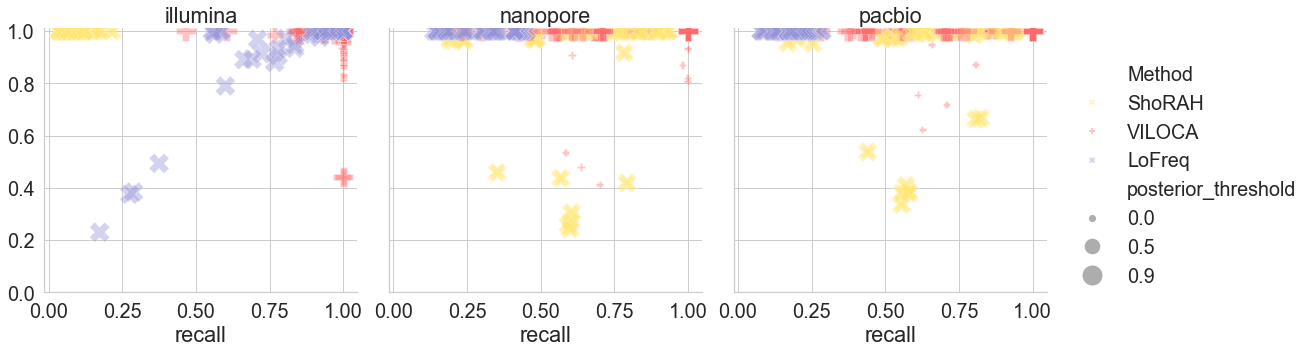

In [10]:
sns.set_theme(style="whitegrid", font_scale=1.8)

g =sns.relplot(
    data=df,
    x='recall', 
    y='precision', 
    hue='Method',
    markers=["X", "P", "X"],
    size='posterior_threshold',
    sizes=(50, 400),
    style='Method',
    col='seq_tech',
    legend=True,
    alpha=0.4, 
    palette=method_palette,
)

g.set_titles(col_template='{col_name}')
g.set(ylim=(0, 1.01))
g.set(ylabel ="")
#g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.tight_layout()

In [11]:
df[(df['coverage']=='1000') 
   & (df['Method']=='VILOCA')
   & (df['Population']=='Population 7')
   & (df['seq_tech']=='pacbio')]

,method,params,replicate,posterior_threshold,precision,recall,f1,seq_tech,coverage,haplos,Method,Population
274,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,0,0.0,1.0,1.000000,1.000000,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
275,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,1,0.0,1.0,0.925158,0.961124,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
276,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,2,0.0,1.0,1.000000,1.000000,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
277,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,3,0.0,1.0,1.000000,1.000000,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
278,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,4,0.0,1.0,0.925711,0.961423,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
1769,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,0,0.5,1.0,0.750999,0.857795,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
1770,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,1,0.5,1.0,0.925158,0.961124,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
1771,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,2,0.5,1.0,0.943461,0.970908,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
1772,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,3,0.5,1.0,0.919226,0.957913,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7
1773,viloca_alpha_0.00001,seq_tech~pacbio__seq_mode~shotgun__seq_mode_pa...,4,0.5,1.0,0.873476,0.932466,pacbio,1000,5@5@600@200@300@geom@0.75,VILOCA,Population 7


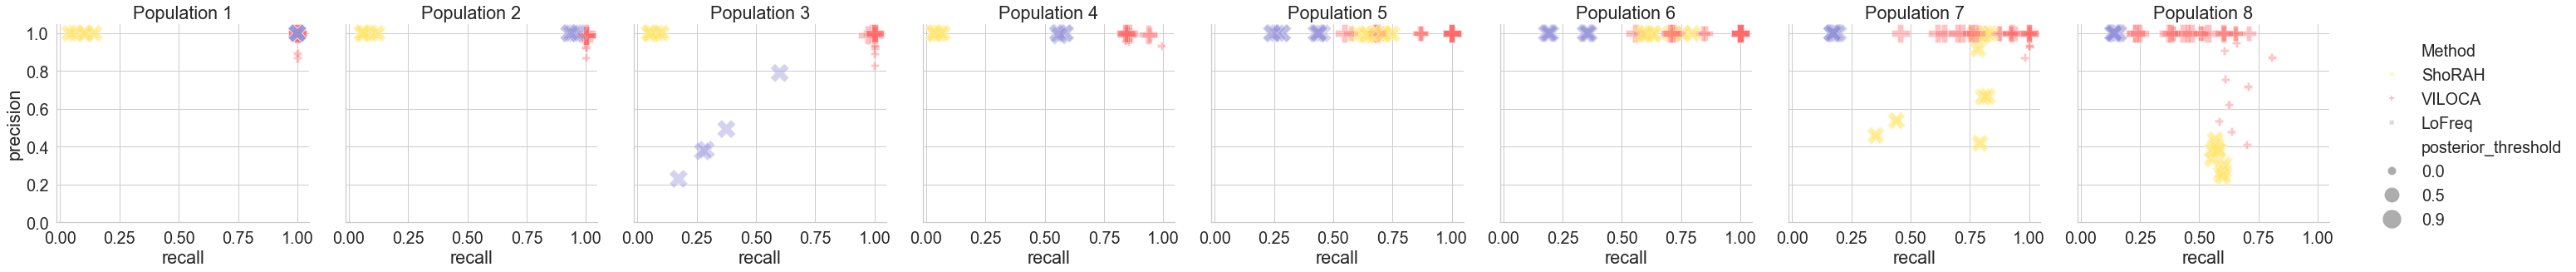

In [12]:
sns.set_theme(style="whitegrid", font_scale=1.8)

g =sns.relplot(
    data=df[df['coverage']=='1000'],
    x='recall', 
    y='precision', 
    hue='Method',
    markers=["X", "P", "X"],
    size='posterior_threshold',
    sizes=(100, 500),
    style='Method',
    #row='seq_tech', 
    col='Population',
    col_order=["Population 1", "Population 2", "Population 3", "Population 4", "Population 5", "Population 6", "Population 7", "Population 8"],
    legend=True,
    alpha=0.4, 
    palette=method_palette,
)

g.set_titles(col_template='{col_name}')
g.set(ylim=(0, 1.05))
#g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.tight_layout()
g.fig.savefig("distance__precision-recall-plot-all-reads.svg")

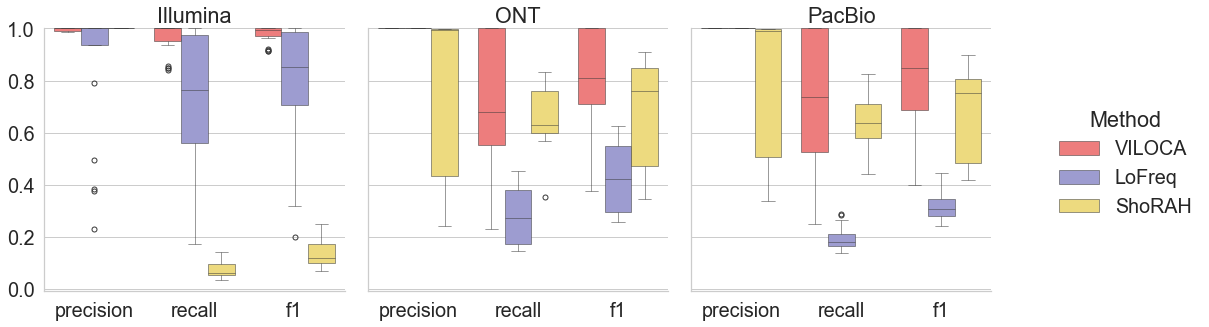

In [13]:
sns.set_theme(style="whitegrid", font_scale=1.8)

df_long = df[df['posterior_threshold']>=0.9]
df_long = df_long.drop(columns=['posterior_threshold'])
df_long = pd.melt(df_long, id_vars=["Method",
                                    "method",
                                    "params", 
                                    "replicate", 
                                    "seq_tech", 
                                    "coverage", 
                                    "haplos", 
                                    "Population"]).assign(
        params=lambda x: x["params"].str.replace("_", "\n")
    )


mapping_seqtech = {'illumina': 'Illumina', 
                    'nanopore': 'ONT', 
                  'pacbio': 'PacBio'}

df_long["seq_tech"] = df_long['seq_tech'].apply(lambda x: mapping_seqtech[x])

g = sns.catplot(
        data=df_long[df_long['coverage']=='1000'],
        x="variable",
        y="value",
        hue="Method",
        col="seq_tech",
        kind="box",
        hue_order=[
                 'VILOCA',
                 'LoFreq',
                 'ShoRAH',
                ] ,
        legend=True, 
        width=0.8,
        linewidth=0.5,
        sharex=True,
        margin_titles=True,
        palette=method_palette,
    )
g.set_titles(col_template='{col_name}')
g.set(ylim=(-0.01, 1))
g.set(xlabel ="")
g.set(ylabel ="")
#g.add_legend(fontsize=20)
g.tight_layout()

g.fig.savefig("distance__snvs_seq_tech.svg")

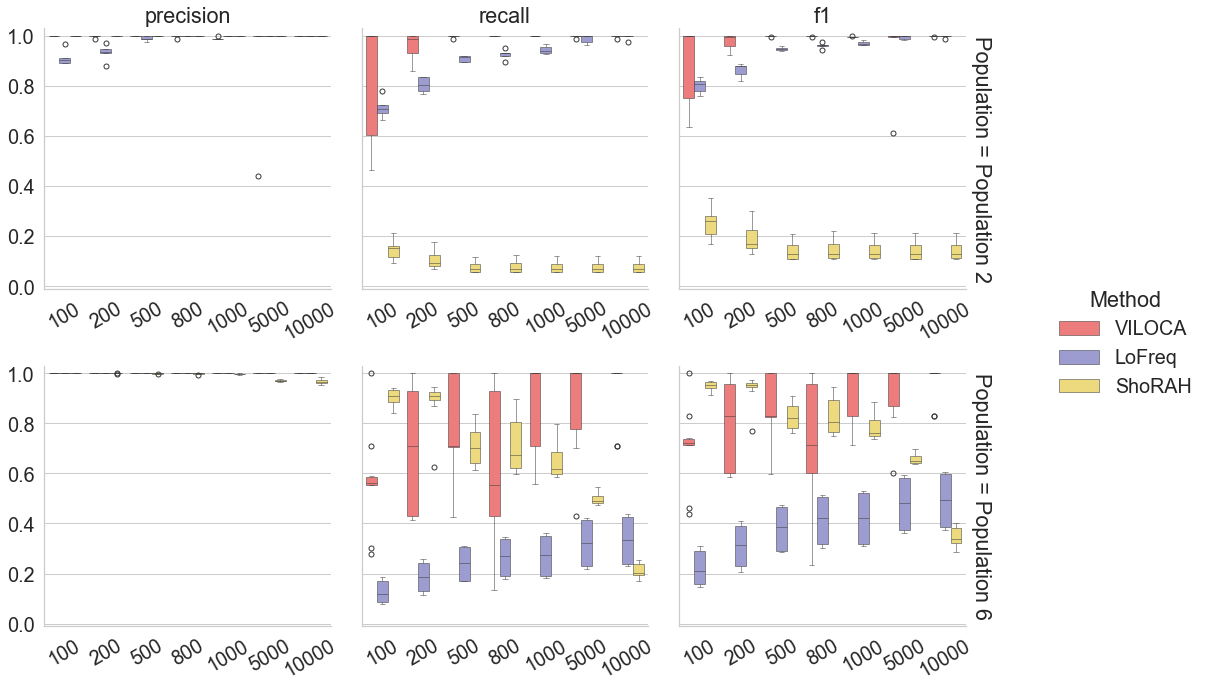

In [14]:
sns.set_theme(style="whitegrid", font_scale=1.8)

df_long = df[df['posterior_threshold']>=0.9]
df_long = df_long.drop(columns=['posterior_threshold'])
df_long = pd.melt(df_long, id_vars=["Method",
                                    "method",
                                    "params", 
                                    "replicate", 
                                    "seq_tech", 
                                    "coverage", 
                                    "haplos", 
                                    "Population"]).assign(
        params=lambda x: x["params"].str.replace("_", "\n")
    )


g = sns.catplot(
        data=df_long[df_long['Population'].isin(["Population 2", "Population 6"])],
        x="coverage",
        y="value",
        hue="Method",
        col="variable",
        row='Population',
        kind="box",
        order=['100', '200', '500', '800', '1000', '5000', '10000'],
        hue_order=[
                 'VILOCA',
                 'LoFreq',
                 'ShoRAH',
                ] ,
        legend=True, 
        width=0.8,
        linewidth=0.5,
        sharex=False,
        margin_titles=True,
        palette=method_palette,
    )
g.set_titles(row_template='{row_name}')
g.set_titles(col_template='{col_name}')

g.set(ylim=(-0.01, 1.03))
g.set(xlabel ="")
g.set(ylabel ="")
g.set_xticklabels(rotation=30)
#g.add_legend(fontsize=20)
g.tight_layout()

g.fig.savefig("distance__snvs_coverage.svg")

In [15]:
df_long[
    (df_long['Method']=='LoFreq') 
    & (df_long['variable']=='recall')
    & (df_long['seq_tech']!='Illumina')
]['value'].mean()

0.43415435521530904

In [22]:
df_long[
    (df_long['Method']=='LoFreq') 
    & (df_long['variable']=='precision')
    & (df_long['seq_tech']!='Illumina')
]['value'].mean()

0.9762829067302236

In [16]:
df_long[
    (df_long['Method']=='ShoRAH') 
    & (df_long['variable']=='recall')
    & (df_long['seq_tech']!='Illumina')
]['value'].mean()

0.4650991140341277

In [21]:
df_long[
    (df_long['Method']=='ShoRAH') 
    & (df_long['variable']=='precision')
    & (df_long['seq_tech']!='Illumina')
]['value'].mean()

0.9355322954596151

In [19]:
df_long[
    (df_long['Method']=='VILOCA') 
    & (df_long['variable']=='recall')
    & (df_long['seq_tech']!='Illumina')
]['value'].mean()

0.8082377745264459

In [20]:
df_long[
    (df_long['Method']=='VILOCA') 
    & (df_long['variable']=='precision')
    & (df_long['seq_tech']!='Illumina')
]['value'].mean()

0.9955442966841386